# Load raster data via WCS and xarray

In [1]:
from datetime import datetime

import geoengine as ge

## Initialize Geo Engine

In [2]:
ge.initialize("http://localhost:3030/api")

In [3]:
session = ge.get_session()
session

Server:              http://localhost:3030/api
User Id:             86cd6168-20ea-44d7-a9e9-faee151f8703
Session Id:          168fd001-65cb-42c5-8dc1-5913b94b13c7
Session valid until: 2025-09-12T20:06:34.190Z

## Define workflow of MODIS NDVI raster

In [4]:
workflow = ge.register_workflow({"type": "Raster", "operator": {"type": "GdalSource", "params": {"data": "ndvi"}}})
workflow

1e415c9c-55f3-51a2-b50b-b5053d1debbb

## Query the ResultDescriptor

In [5]:
workflow.get_result_descriptor()

Data type:         U8
Spatial Reference: EPSG:4326
Spatial Grid: SpatialGridDescriptor(spatial_grid=SpatialGridDefinition(geo_transform=Origin: (-180.0, 90.0), X Pixel Size: 0.1, Y Pixel Size: -0.1, grid_bounds=GridBoundingBox2D(top_left_idx=GridIdx2D(x_idx=0, y_idx=0), bottom_right_idx=GridIdx2D(x_idx=3599, y_idx=1799))), descriptor=<SpatialGridDescriptorState.SOURCE: 'source'>) 
Time Bounds: TimeInterval(start=2014-01-01T00:00:00.000, end=2014-07-01T00:00:00.000)
Bands:
    ndvi: vegetation

## Query raster via WCS

In [6]:
time = datetime.strptime("2014-04-01T12:00:00.000Z", "%Y-%m-%dT%H:%M:%S.%f%z")

data = workflow.get_xarray(
    ge.QueryRectangle(
        ge.BoundingBox2D(-180.0, -90.0, 180.0, 90.0),
        ge.TimeInterval(time, time),
    ),
    spatial_resolution=ge.SpatialResolution(360.0 / 16, 180.0 / 16),
)

data

/home/droenner/git/geoengine-python/env/lib/python3.12/site-packages/owslib/coverage/wcs110.py:86: FutureWarning: Truth-testing of elements was a source of confusion and will always return True in future versions. Use specific 'len(elem)' or 'elem is not None' test instead.
  elem = self._capabilities.find(self.ns.OWS('ServiceProvider')) or self._capabilities.find(self.ns.OWS('ServiceProvider'))  # noqa


<xarray.DataArray (band: 1, y: 16, x: 16)> Size: 256B
array([[[255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
         255, 255, 255, 255],
        [255, 255,  19, 255,  14,  19,  20, 255, 255, 255,  15,  21,
          19,  19, 255, 255],
        [255,  39, 125,  23, 255, 255, 255, 255,  29, 177, 106,  59,
          45,  83,  16,  21],
        [255, 255,  22,  52,  22,  59, 255, 255, 211, 143, 133,  97,
         104, 118, 255, 255],
        [255, 255, 227, 111, 152, 255, 255, 255, 255, 124,  70,  36,
          48, 255, 255, 255],
        [255, 255, 255,  93, 255, 255, 255,  53,  55,  47,  66, 110,
         156, 255, 255, 255],
        [255, 255, 255, 255, 255, 255, 255,  62,  51,  56, 255, 100,
         167, 255, 255, 255],
        [255, 255, 255, 255, 255, 136, 255, 255, 222, 118, 255, 255,
         234, 255, 255, 255],
        [255, 255, 255, 255, 195, 217, 255, 255, 255, 199, 255, 255,
         255, 255, 223, 255],
        [255, 255, 255, 255, 255, 233, 255, 255, 255, 206, 255, 255,
         255, 136, 255, 255],
        [255, 255, 255, 255, 255, 207, 255, 255, 255, 255, 255, 255,
         255,  91, 114, 255],
        [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
         255, 255, 255, 255],
        [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
         255, 255, 255, 255],
        [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
         255, 255, 255, 255],
        [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
         255, 255, 255, 255],
        [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
         255, 255, 255, 255]]], dtype=uint8)
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 128B -168.8 -146.2 -123.8 ... 123.8 146.2 168.8
  * y            (y) float64 128B 84.38 73.12 61.88 ... -61.88 -73.12 -84.38
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
    crs:            EPSG:4326
    res:            (22.5, -11.25)
    transform:      | 22.50, 0.00,-180.00|\n| 0.00,-11.25, 90.00|\n| 0.00, 0....

## Query raster with no_data_value instead of a mask

In [7]:
time = datetime.strptime("2014-04-01T12:00:00.000Z", "%Y-%m-%dT%H:%M:%S.%f%z")

data_with_no_data_value = workflow.get_xarray(
    ge.QueryRectangle(
        ge.BoundingBox2D(-180.0, -90.0, 180.0, 90.0),
        ge.TimeInterval(time, time),
    ),
    spatial_resolution=ge.SpatialResolution(360.0 / 16, 180.0 / 16),
    force_no_data_value=77.0,
)

data_with_no_data_value

/home/droenner/git/geoengine-python/env/lib/python3.12/site-packages/owslib/coverage/wcs110.py:86: FutureWarning: Truth-testing of elements was a source of confusion and will always return True in future versions. Use specific 'len(elem)' or 'elem is not None' test instead.
  elem = self._capabilities.find(self.ns.OWS('ServiceProvider')) or self._capabilities.find(self.ns.OWS('ServiceProvider'))  # noqa


<xarray.DataArray (band: 1, y: 16, x: 16)> Size: 256B
array([[[255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
         255, 255, 255, 255],
        [255, 255,  19, 255,  14,  19,  20, 255, 255, 255,  15,  21,
          19,  19, 255, 255],
        [255,  39, 125,  23, 255, 255, 255, 255,  29, 177, 106,  59,
          45,  83,  16,  21],
        [255, 255,  22,  52,  22,  59, 255, 255, 211, 143, 133,  97,
         104, 118, 255, 255],
        [255, 255, 227, 111, 152, 255, 255, 255, 255, 124,  70,  36,
          48, 255, 255, 255],
        [255, 255, 255,  93, 255, 255, 255,  53,  55,  47,  66, 110,
         156, 255, 255, 255],
        [255, 255, 255, 255, 255, 255, 255,  62,  51,  56, 255, 100,
         167, 255, 255, 255],
        [255, 255, 255, 255, 255, 136, 255, 255, 222, 118, 255, 255,
         234, 255, 255, 255],
        [255, 255, 255, 255, 195, 217, 255, 255, 255, 199, 255, 255,
         255, 255, 223, 255],
        [255, 255, 255, 255, 255, 233, 255, 255, 255, 206, 255, 255,
         255, 136, 255, 255],
        [255, 255, 255, 255, 255, 207, 255, 255, 255, 255, 255, 255,
         255,  91, 114, 255],
        [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
         255, 255, 255, 255],
        [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
         255, 255, 255, 255],
        [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
         255, 255, 255, 255],
        [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
         255, 255, 255, 255],
        [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
         255, 255, 255, 255]]], dtype=uint8)
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 128B -168.8 -146.2 -123.8 ... 123.8 146.2 168.8
  * y            (y) float64 128B 84.38 73.12 61.88 ... -61.88 -73.12 -84.38
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Area
    _FillValue:     77
    scale_factor:   1.0
    add_offset:     0.0
    crs:            EPSG:4326
    res:            (22.5, -11.25)
    transform:      | 22.50, 0.00,-180.00|\n| 0.00,-11.25, 90.00|\n| 0.00, 0....

## Plot the raster via matplotlib

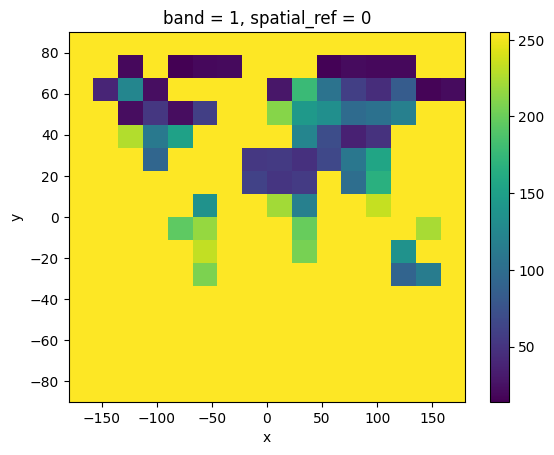

In [8]:
data.plot()

## Select North America (left upper part) from the data array via geo coordinates

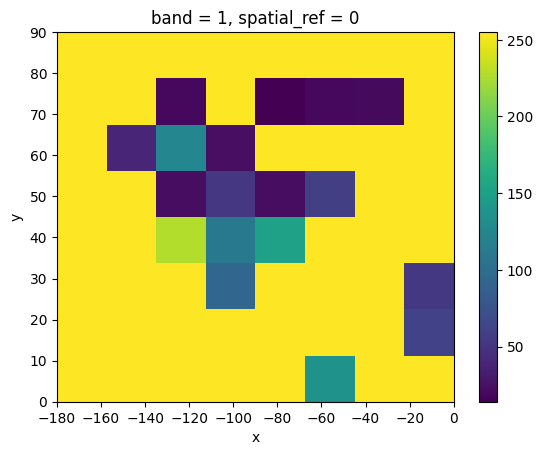

In [9]:
data.sel(x=slice(-180, 0), y=slice(90, 0)).plot()

## Get a pixel via geo coordinate

In [10]:
data.sel(x=[-150], y=[60], method="nearest")

<xarray.DataArray (band: 1, y: 1, x: 1)> Size: 1B
array([[[39]]], dtype=uint8)
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 8B -146.2
  * y            (y) float64 8B 61.88
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
    crs:            EPSG:4326
    res:            (22.5, -11.25)
    transform:      | 22.50, 0.00,-180.00|\n| 0.00,-11.25, 90.00|\n| 0.00, 0....

# Download raster as GeoTIFF

In [11]:
workflow.download_raster(
    ge.QueryRectangle(
        ge.BoundingBox2D(-180.0, -90.0, 180.0, 90.0),
        ge.TimeInterval(time, time),
    ),
    file_path="raster_download.tif",
    spatial_resolution=ge.SpatialResolution(360.0 / 16, 180.0 / 16),
)

/home/droenner/git/geoengine-python/env/lib/python3.12/site-packages/owslib/coverage/wcs110.py:86: FutureWarning: Truth-testing of elements was a source of confusion and will always return True in future versions. Use specific 'len(elem)' or 'elem is not None' test instead.
  elem = self._capabilities.find(self.ns.OWS('ServiceProvider')) or self._capabilities.find(self.ns.OWS('ServiceProvider'))  # noqa
